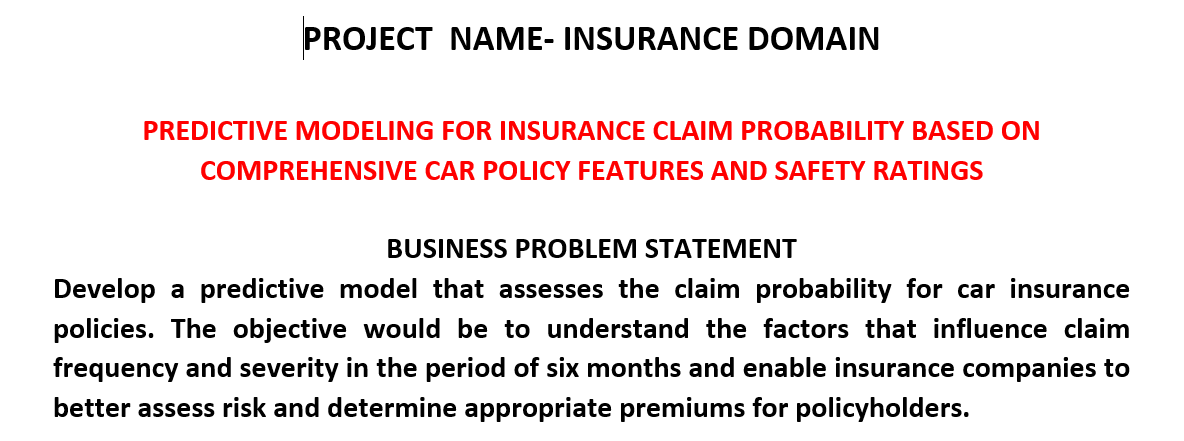

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data.csv")
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


## EDA & Pre-Processing

#### Col no 1 = 'policy_id'

In [5]:
#will remove this column later
#just making a copy for now
df1 = df.copy()

#### Col no 2 = 'policy_tenure' 
#### Col no 3 = age_of_car
#### Col no 4 = 'age_of_policyholder'

In [19]:
#multiply col 2 by 10, col 3 and 4 by 100 and make them whole to represent the no of years.
df1['policy_tenure'] = np.round(df1['policy_tenure'] * 10)
df1['age_of_car'] = np.round(df1['age_of_car'] * 100)
df1['age_of_policyholder'] = np.round(df1['age_of_policyholder'] * 100)

df1['policy_tenure'] = df1['policy_tenure'].astype(str).str.split('.').str[0]
df1['age_of_car'] = df1['age_of_car'].astype(str).str.split('.').str[0]
df1['age_of_policyholder'] = df1['age_of_policyholder'].astype(str).str.split('.').str[0]
df1.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,5,5,64,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,7,2,38,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,8,2,38,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,9,11,43,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,6,11,63,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


#### Col no 5 = 'area_cluster'

In [7]:
#'area_cluster' = got 22 clusters, categorical

value_counts_desc = df1['area_cluster'].value_counts().sort_values(ascending=False)
print("Unique values and their counts in 'area_cluster' column (descending order):")
print(value_counts_desc)

Unique values and their counts in 'area_cluster' column (descending order):
area_cluster
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: count, dtype: int64


#### Col no 6 = 'population_density'

In [8]:
# Each cluster has a specific number for population density.
df1 = pd.read_csv('data.csv')
grouped = df1.groupby('area_cluster')['population_density'].apply(list).reset_index()
for index, row in grouped.iterrows():
    cluster = row['area_cluster']
    unique_numbers = sorted(set(row['population_density']))  
    print(f"Cluster {cluster}: {unique_numbers}")

Cluster C1: [4990]
Cluster C10: [73430]
Cluster C11: [6108]
Cluster C12: [34791]
Cluster C13: [5410]
Cluster C14: [7788]
Cluster C15: [290]
Cluster C16: [16206]
Cluster C17: [65567]
Cluster C18: [35036]
Cluster C19: [27742]
Cluster C2: [27003]
Cluster C20: [20905]
Cluster C21: [3264]
Cluster C22: [16733]
Cluster C3: [4076]
Cluster C4: [21622]
Cluster C5: [34738]
Cluster C6: [13051]
Cluster C7: [6112]
Cluster C8: [8794]
Cluster C9: [17804]


In [168]:
# Alligning each cluster with the units and popln density

import pandas as pd
df1 = pd.read_csv('data.csv')

grouped = df1.groupby('area_cluster')['population_density'].apply(list).reset_index()

value_counts_desc = df1['area_cluster'].value_counts().sort_values(ascending=False).reset_index()
value_counts_desc.columns = ['area_cluster', 'units']  

ordered_clusters = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
                    'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19',
                    'C20', 'C21', 'C22']

df1['area_cluster'] = pd.Categorical(df1['area_cluster'], categories=ordered_clusters, ordered=True)

merged_data = pd.merge(value_counts_desc, grouped, on='area_cluster', how='left')

for cluster in ordered_clusters:
    row = merged_data[merged_data['area_cluster'] == cluster].iloc[0]
    units = row['units']
    population_densities = row['population_density']
    if isinstance(population_densities, list):
        unique_numbers = sorted(set(population_densities))
    else:
        unique_numbers = []
    print(f"Cluster {cluster}: Counts {units}, Population Densities {unique_numbers}")

Cluster C1: Counts 1468, Population Densities [4990]
Cluster C2: Counts 7342, Population Densities [27003]
Cluster C3: Counts 6101, Population Densities [4076]
Cluster C4: Counts 665, Population Densities [21622]
Cluster C5: Counts 6979, Population Densities [34738]
Cluster C6: Counts 890, Population Densities [13051]
Cluster C7: Counts 2167, Population Densities [6112]
Cluster C8: Counts 13654, Population Densities [8794]
Cluster C9: Counts 2734, Population Densities [17804]
Cluster C10: Counts 3155, Population Densities [73430]
Cluster C11: Counts 1212, Population Densities [6108]
Cluster C12: Counts 1589, Population Densities [34791]
Cluster C13: Counts 3423, Population Densities [5410]
Cluster C14: Counts 3660, Population Densities [7788]
Cluster C15: Counts 771, Population Densities [290]
Cluster C16: Counts 401, Population Densities [16206]
Cluster C17: Counts 492, Population Densities [65567]
Cluster C18: Counts 242, Population Densities [35036]
Cluster C19: Counts 952, Populati

#### Col no 7 = 'make'
#### Col no 8 = 'segment'
#### Col no 9 = 'model'
#### Col no 10 = 'fuel_type'

In [10]:
# each of the above have categorical variables,let us see their individual conuts.

In [11]:
columns_to_process = ['make', 'segment', 'model', 'fuel_type']

for column in columns_to_process:
    print('-' * 30 + f'{column}' + '-' * 30)
    unique_values_counts = df[column].value_counts()
    print(f"Unique values and their counts in '{column}' column:")
    print(unique_values_counts)
    print()

------------------------------make------------------------------
Unique values and their counts in 'make' column:
make
1    38126
3    14018
2     2373
5     2114
4     1961
Name: count, dtype: int64

------------------------------segment------------------------------
Unique values and their counts in 'segment' column:
segment
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: count, dtype: int64

------------------------------model------------------------------
Unique values and their counts in 'model' column:
model
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: count, dtype: int64

------------------------------fuel_type------------------------------
Unique values and their counts in 'fuel_type' column:
fuel_type
Petrol    20532
CNG       20330
Diesel    17730
Name: count, dtype: int64



#### Col no 11 = 'max_torque
#### Col no 12 = 'max_power'
#### Col no 13 = 'engine_type'

In [12]:
columns_to_process = ['max_torque', 'max_power', 'engine_type']

for column in columns_to_process:
    print('-' * 30 + f'{column}' + '-' * 30)
    unique_values_counts = df[column].value_counts()
    print(f"Unique values and their counts in '{column}' column:")
    print(unique_values_counts)
    print()

------------------------------max_torque------------------------------
Unique values and their counts in 'max_torque' column:
max_torque
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: count, dtype: int64

------------------------------max_power------------------------------
Unique values and their counts in 'max_power' column:
max_power
88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: count, dtype: int64

------------------------------engine_type------------------------------
Unique values and their counts in 'engine_type' column:
engine_type
F8D Petrol Engine            14948
1.5 L U2 CRDi                14018
K Seri

In [13]:
# Alligning the max_torque and max_power with the same counts 

max_torque_data = {
    'max_torque': [
        '113Nm@4400rpm',
        '60Nm@3500rpm',
        '250Nm@2750rpm',
        '82.1Nm@3400rpm',
        '91Nm@4250rpm',
        '200Nm@1750rpm',
        '200Nm@3000rpm',
        '85Nm@3000rpm',
        '170Nm@4000rpm'
    ],
    'count_torque': [
        17796,
        14948,
        14018,
        4173,
        2373,
        2114,
        1598,
        1209,
        363
    ]
}

max_power_data = {
    'max_power': [
        '88.50bhp@6000rpm',
        '40.36bhp@6000rpm',
        '113.45bhp@4000rpm',
        '55.92bhp@5300rpm',
        '67.06bhp@5500rpm',
        '97.89bhp@3600rpm',
        '88.77bhp@4000rpm',
        '61.68bhp@6000rpm',
        '118.36bhp@5500rpm'
    ],
    'count_power': [
        17796,
        14948,
        14018,
        4173,
        2373,
        2114,
        1598,
        1209,
        363
    ]
}

df_torque = pd.DataFrame(max_torque_data)
df_power = pd.DataFrame(max_power_data)

df_combined = pd.concat([df_torque, df_power], axis=1)

df_combined.sort_values(by='max_torque', ascending=False, inplace=True)

print(df_combined)

       max_torque  count_torque          max_power  count_power
4    91Nm@4250rpm          2373   67.06bhp@5500rpm         2373
7    85Nm@3000rpm          1209   61.68bhp@6000rpm         1209
3  82.1Nm@3400rpm          4173   55.92bhp@5300rpm         4173
1    60Nm@3500rpm         14948   40.36bhp@6000rpm        14948
2   250Nm@2750rpm         14018  113.45bhp@4000rpm        14018
6   200Nm@3000rpm          1598   88.77bhp@4000rpm         1598
5   200Nm@1750rpm          2114   97.89bhp@3600rpm         2114
8   170Nm@4000rpm           363  118.36bhp@5500rpm          363
0   113Nm@4400rpm         17796   88.50bhp@6000rpm        17796


#### Col no 13 = 'engine_type'

In [14]:
engine_type_counts = df1['engine_type'].value_counts()
print("Unique Engine Types and their Counts:")
for engine_type, count in engine_type_counts.items():
    print(f"Engine Type: {engine_type}, Count: {count}")

Unique Engine Types and their Counts:
Engine Type: F8D Petrol Engine, Count: 14948
Engine Type: 1.5 L U2 CRDi, Count: 14018
Engine Type: K Series Dual jet, Count: 13776
Engine Type: K10C, Count: 4173
Engine Type: 1.2 L K Series Engine, Count: 2940
Engine Type: 1.0 SCe, Count: 2373
Engine Type: i-DTEC, Count: 2114
Engine Type: 1.5 Turbocharged Revotorq, Count: 1598
Engine Type: G12B, Count: 1209
Engine Type: 1.2 L K12N Dualjet, Count: 1080
Engine Type: 1.5 Turbocharged Revotron, Count: 363


#### Col no 14 = 'airbags'

In [15]:
airbags_counts = df1['airbags'].value_counts()
print("Unique Airbag Types and their Counts:")
for airbag_type, count in airbags_counts.items():
    print(f"Airbag Type: {airbag_type}, Count: {count}")

Unique Airbag Types and their Counts:
Airbag Type: 2, Count: 40425
Airbag Type: 6, Count: 16958
Airbag Type: 1, Count: 1209


#### Lets quickly check the null values for these 14 cols 

In [16]:
cols_to_check = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density',
    'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags'
]

null_counts = df1[cols_to_check].isnull().sum()

print("Null Value Counts:")
for col, count in null_counts.items():
    print(f"{col}: {count}")

Null Value Counts:
policy_tenure: 0
age_of_car: 0
age_of_policyholder: 0
area_cluster: 0
population_density: 0
make: 0
segment: 0
model: 0
fuel_type: 0
max_torque: 0
max_power: 0
engine_type: 0
airbags: 0


#### No null vals for above cols

### Now I am jumping to the 19th column since I would be considering the yes/no columns at the end.

In [22]:
columns_to_find = [
    'rear_brakes_type',
    'displacement',
    'cylinder',
    'transmission_type',
    'gear_box',
    'steering_type',
    'turning_radius',
    'length',
    'width',
    'height',
    'gross_weight'
]

indices = [df.columns.get_loc(col) for col in columns_to_find]

print("Column Indices:")
for col, idx in zip(columns_to_find, indices):
    print(f"{col}: {idx}")

Column Indices:
rear_brakes_type: 19
displacement: 20
cylinder: 21
transmission_type: 22
gear_box: 23
steering_type: 24
turning_radius: 25
length: 26
width: 27
height: 28
gross_weight: 29


In [169]:
for col in df1.columns:
    print(f"Column Name: {col}, Column Number: {df1.columns.get_loc(col)}")

Column Name: policy_id, Column Number: 0
Column Name: policy_tenure, Column Number: 1
Column Name: age_of_car, Column Number: 2
Column Name: age_of_policyholder, Column Number: 3
Column Name: area_cluster, Column Number: 4
Column Name: population_density, Column Number: 5
Column Name: make, Column Number: 6
Column Name: segment, Column Number: 7
Column Name: model, Column Number: 8
Column Name: fuel_type, Column Number: 9
Column Name: max_torque, Column Number: 10
Column Name: max_power, Column Number: 11
Column Name: engine_type, Column Number: 12
Column Name: airbags, Column Number: 13
Column Name: is_esc, Column Number: 14
Column Name: is_adjustable_steering, Column Number: 15
Column Name: is_tpms, Column Number: 16
Column Name: is_parking_sensors, Column Number: 17
Column Name: is_parking_camera, Column Number: 18
Column Name: rear_brakes_type, Column Number: 19
Column Name: displacement, Column Number: 20
Column Name: cylinder, Column Number: 21
Column Name: transmission_type, Col

In [29]:
# Checking for null values
cols_to_check = list(range(19, 30))

null_counts = df1.iloc[:, cols_to_check].isnull().sum()

print("Null Value Counts:")
for col_idx, count in null_counts.items():
    print(f"Column {col_idx}: {count}")

Null Value Counts:
Column rear_brakes_type: 0
Column displacement: 0
Column cylinder: 0
Column transmission_type: 0
Column gear_box: 0
Column steering_type: 0
Column turning_radius: 0
Column length: 0
Column width: 0
Column height: 0
Column gross_weight: 0


#### Col no 19 = 'rear_brakes_type'

In [30]:
unique_values_counts = df1['rear_brakes_type'].value_counts(dropna=False)

print("Unique values and their counts in 'rear_brakes_type' column:")
print(unique_values_counts)

Unique values and their counts in 'rear_brakes_type' column:
rear_brakes_type
Drum    44574
Disc    14018
Name: count, dtype: int64


#### Col no 20 = 'displacement'

In [31]:
unique_values_counts = df1['displacement'].value_counts(dropna=False)

print("Unique values and their counts in 'displacement' column:")
print(unique_values_counts)

Unique values and their counts in 'displacement' column:
displacement
1197    17796
796     14948
1493    14018
998      4173
999      2373
1498     2114
1497     1598
1196     1209
1199      363
Name: count, dtype: int64


#### Col no 21 = 'cylinder'

In [32]:
unique_values_counts = df1['cylinder'].value_counts(dropna=False)

print("Unique values and their counts in 'cylinder' column:")
print(unique_values_counts)

Unique values and their counts in 'cylinder' column:
cylinder
4    36735
3    21857
Name: count, dtype: int64


#### Col no 22 = 'transmission_type'

In [33]:
unique_values_counts = df1['transmission_type'].value_counts(dropna=False)

print("Unique values and their counts in 'transmission_type' column:")
print(unique_values_counts)

Unique values and their counts in 'transmission_type' column:
transmission_type
Manual       38181
Automatic    20411
Name: count, dtype: int64


#### Col no 23 = 'gear_box'

In [34]:
unique_values_counts = df1['gear_box'].value_counts(dropna=False)

print("Unique values and their counts in 'gear_box' column:")
print(unique_values_counts)

Unique values and their counts in 'gear_box' column:
gear_box
5    44211
6    14381
Name: count, dtype: int64


#### Col no 24 = 'steering_type'

In [35]:
unique_values_counts = df1['steering_type'].value_counts(dropna=False)

print("Unique values and their counts in 'steering_type' column:")
print(unique_values_counts)

Unique values and their counts in 'steering_type' column:
steering_type
Power       33502
Electric    23881
Manual       1209
Name: count, dtype: int64


#### Col no 25 = 'turning_radius'

In [36]:
unique_values_counts = df1['turning_radius'].value_counts(dropna=False)

print("Unique values and their counts in 'turning_radius' column:")
print(unique_values_counts)

Unique values and their counts in 'turning_radius' column:
turning_radius
4.60    14948
4.80    14856
5.20    14018
4.70     4173
5.00     3971
4.85     2940
4.90     2114
4.50     1209
5.10      363
Name: count, dtype: int64


#### Col no 26 = 'length'
#### Col no 27 = 'width'
#### Col no 28 = 'height'
#### Col no 29 = 'gross_weight'

In [37]:
value_counts = df1.groupby(['length', 'width', 'height', 'gross_weight']).size().reset_index(name='count')
value_counts_sorted = value_counts.sort_values(by='length')

print(value_counts_sorted)

    length  width  height  gross_weight  count
0     3445   1515    1475          1185  14948
1     3655   1620    1675          1340   4173
2     3675   1475    1825          1510   1209
3     3731   1579    1490          1155   2373
4     3845   1735    1530          1335  13776
5     3990   1745    1500          1410   2940
6     3990   1755    1523          1490   1598
7     3993   1811    1606          1660    363
8     3995   1695    1501          1051   2114
9     3995   1735    1515          1335   1080
10    4300   1790    1635          1720  14018


#### Col no 42 = 'ncap_rating'

In [38]:
try:
    col_index = df1.columns.get_loc('ncap_rating')
    print(f"The index (column number) of 'ncap_rating' column is: {col_index}")
except KeyError:
    print("Column 'ncap_rating' does not exist in the DataFrame.")

The index (column number) of 'ncap_rating' column is: 42


In [39]:
unique_values_counts = df1['ncap_rating'].value_counts(dropna=False)

print("Unique values and their counts in 'ncap_rating' column:")
print(unique_values_counts)

Unique values and their counts in 'ncap_rating' column:
ncap_rating
2    21402
0    19097
3    14018
4     2114
5     1961
Name: count, dtype: int64


### Now let us consider the yes/no cols

In [40]:
# Cols - 14 - 18 & 30- 42

cols_to_extract = list(range(14, 19)) + list(range(30, 42)) 
extracted_df = df1.iloc[:, cols_to_extract]

extracted_df

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
1,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
2,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
3,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,No,No,No,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,No,No,No,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
58589,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
58590,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [41]:
null_counts = df1.isnull().sum()
print("Null value counts in extracted columns:")
print(null_counts)

Null value counts in extracted columns:
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_ra

In [42]:
cols_of_interest = [
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
    'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 
    'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
    'is_ecw', 'is_speed_alert'
]

for col in cols_of_interest:
    unique_counts = df1[col].value_counts()
    print(f"{col.ljust(34)} {unique_counts.to_string()}")
    print("-" * 40)

is_esc                             is_esc
No     40191
Yes    18401
----------------------------------------
is_adjustable_steering             is_adjustable_steering
Yes    35526
No     23066
----------------------------------------
is_tpms                            is_tpms
No     44574
Yes    14018
----------------------------------------
is_parking_sensors                 is_parking_sensors
Yes    56219
No      2373
----------------------------------------
is_parking_camera                  is_parking_camera
No     35704
Yes    22888
----------------------------------------
is_front_fog_lights                is_front_fog_lights
Yes    33928
No     24664
----------------------------------------
is_rear_window_wiper               is_rear_window_wiper
No     41634
Yes    16958
----------------------------------------
is_rear_window_washer              is_rear_window_washer
No     41634
Yes    16958
----------------------------------------
is_rear_window_defogger            is_rear_win

### Check for Outliers in 1st 3 cols

In [43]:
df1

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,5,5,64,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,7,2,38,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,8,2,38,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,9,11,43,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,6,11,63,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,4,13,64,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,12,2,52,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,12,5,45,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,12,14,56,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [44]:
df1['policy_tenure'] = pd.to_numeric(df1['policy_tenure'], errors='coerce')
df1['age_of_car'] = pd.to_numeric(df1['age_of_car'], errors='coerce')
df1['age_of_policyholder'] = pd.to_numeric(df1['age_of_policyholder'], errors='coerce')

description = df1[['policy_tenure', 'age_of_car', 'age_of_policyholder']].describe()

print(description)

       policy_tenure    age_of_car  age_of_policyholder
count   58592.000000  58592.000000         58592.000000
mean        6.095900      6.942364            46.970406
std         4.139798      5.672065            12.229815
min         0.000000      0.000000            29.000000
25%         2.000000      2.000000            37.000000
50%         6.000000      6.000000            45.000000
75%        10.000000     11.000000            55.000000
max        14.000000    100.000000           100.000000


In [49]:
print("Data Types of all columns:")
print(df1.dtypes)

Data Types of all columns:
policy_id                           object
policy_tenure                        int64
age_of_car                           int64
age_of_policyholder                  int32
area_cluster                        object
population_density                  object
make                                object
segment                             object
model                               object
fuel_type                           object
max_torque                          object
max_power                           object
engine_type                         object
airbags                             object
is_esc                              object
is_adjustable_steering              object
is_tpms                             object
is_parking_sensors                  object
is_parking_camera                   object
rear_brakes_type                    object
displacement                        object
cylinder                            object
transmission_type          

In [48]:
df1['age_of_policyholder'] = df1['age_of_policyholder'].astype(int)

In [41]:
# now to get back to outliers for 1st 3 cols

In [146]:
print(df1['age_of_policyholder'].dtype)

int64


In [50]:
df1

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,5,5,64,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,7,2,38,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,8,2,38,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,9,11,43,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,6,11,63,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,4,13,64,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,12,2,52,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,12,5,45,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,12,14,56,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [51]:
df1['age_of_policyholder'] = pd.to_numeric(df1['age_of_policyholder'], errors='coerce').astype(int)

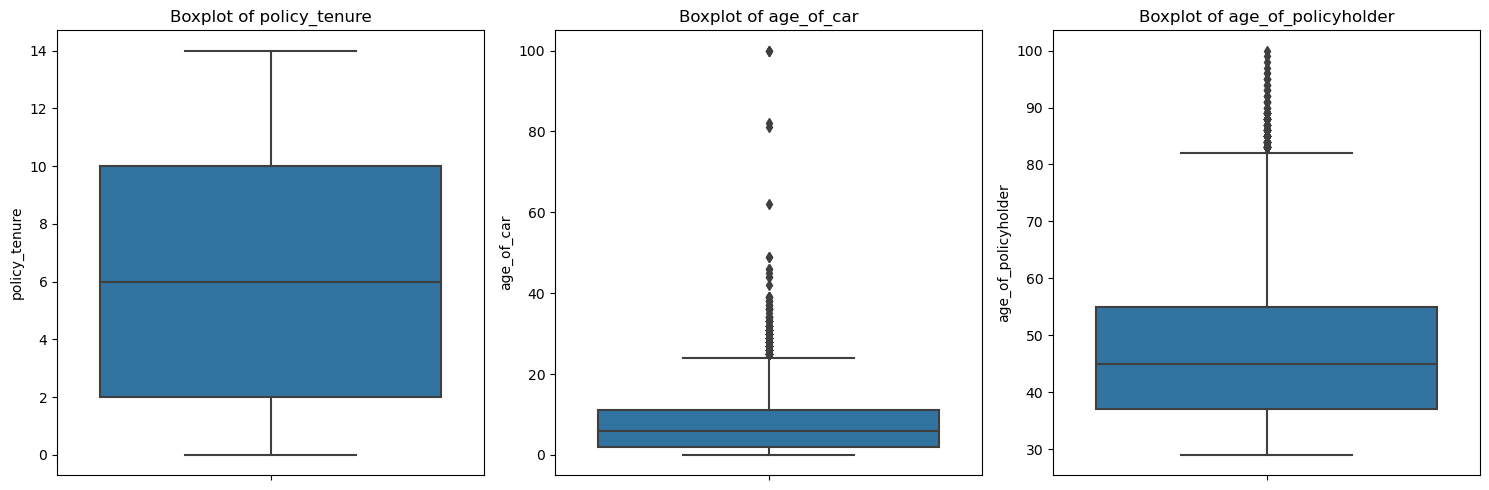

In [149]:
plt.figure(figsize=(15, 5))

# Boxplot for policy_tenure
plt.subplot(1, 3, 1)
sns.boxplot(y=df1['policy_tenure'])
plt.title('Boxplot of policy_tenure')

# Boxplot for age_of_car
plt.subplot(1, 3, 2)
sns.boxplot(y=df1['age_of_car'])
plt.title('Boxplot of age_of_car')

# Boxplot for age_of_policyholder
plt.subplot(1, 3, 3)
sns.boxplot(y=df1['age_of_policyholder'])
plt.title('Boxplot of age_of_policyholder')

plt.tight_layout()
plt.show()

In [52]:
# Calculate quartiles and IQR for policy_tenure
Q1_pt = df1['policy_tenure'].quantile(0.25)
Q3_pt = df1['policy_tenure'].quantile(0.75)
IQR_pt = Q3_pt - Q1_pt

# Calculate lower and upper bounds for policy_tenure outliers
lower_bound_pt = Q1_pt - 1.5 * IQR_pt
upper_bound_pt = Q3_pt + 1.5 * IQR_pt

print("Policy Tenure:")
print("Lower bound for outliers:", lower_bound_pt)
print("Upper bound for outliers:", upper_bound_pt)

# Identify outliers in policy_tenure
outliers_pt = df1[(df1['policy_tenure'] < lower_bound_pt) | (df1['policy_tenure'] > upper_bound_pt)]
print("Number of outliers in policy_tenure:", len(outliers_pt))
print("Indices of outliers in policy_tenure:")
print(outliers_pt.index.tolist())
print('-' * 120)

Policy Tenure:
Lower bound for outliers: -10.0
Upper bound for outliers: 22.0
Number of outliers in policy_tenure: 0
Indices of outliers in policy_tenure:
[]
------------------------------------------------------------------------------------------------------------------------


In [53]:
# Calculate quartiles and IQR for age_of_car
Q1_ac = df1['age_of_car'].quantile(0.25)
Q3_ac = df1['age_of_car'].quantile(0.75)
IQR_ac = Q3_ac - Q1_ac

# Calculate lower and upper bounds for age_of_car outliers
lower_bound_ac = Q1_ac - 1.5 * IQR_ac
upper_bound_ac = Q3_ac + 1.5 * IQR_ac

print("Age of Car:")
print("Lower bound for outliers:", lower_bound_ac)
print("Upper bound for outliers:", upper_bound_ac)

# Identify outliers in age_of_car
outliers_ac = df1[(df1['age_of_car'] < lower_bound_ac) | (df1['age_of_car'] > upper_bound_ac)]
print("Number of outliers in age_of_car:", len(outliers_ac))
print("Indices of outliers in age_of_car:")
print(outliers_ac.index.tolist())
print('-' * 120)

Age of Car:
Lower bound for outliers: -11.5
Upper bound for outliers: 24.5
Number of outliers in age_of_car: 269
Indices of outliers in age_of_car:
[35, 214, 365, 453, 1057, 1497, 1746, 2183, 2288, 2824, 2869, 2921, 3053, 3081, 3115, 3131, 3351, 3457, 3559, 3796, 3988, 4280, 4519, 4586, 4769, 4795, 4804, 4905, 5499, 5878, 5917, 5939, 6282, 6417, 6561, 6870, 6875, 6954, 6969, 7412, 7438, 7441, 7941, 8005, 8745, 8757, 8771, 8836, 9061, 9112, 9137, 9195, 9209, 9494, 10338, 10486, 10522, 10596, 10641, 10719, 11251, 11891, 12050, 12459, 12476, 12815, 14350, 14689, 15059, 15307, 15747, 16000, 16062, 16141, 16284, 16437, 16578, 16987, 17266, 17539, 17650, 18073, 18236, 18437, 18450, 18453, 18607, 19041, 19135, 19468, 19541, 19674, 20021, 20369, 20617, 20700, 20852, 20935, 21098, 21429, 21491, 22859, 22883, 22919, 23002, 23069, 23210, 23287, 23881, 24004, 24179, 24452, 24583, 24824, 24996, 25071, 25345, 25428, 26033, 26183, 26310, 26388, 26645, 26707, 27030, 27164, 27308, 27565, 27652, 27957, 

In [54]:
# Calculate quartiles and IQR for age_of_policyholder
Q1_ap = df1['age_of_policyholder'].quantile(0.25)
Q3_ap = df1['age_of_policyholder'].quantile(0.75)
IQR_ap = Q3_ap - Q1_ap

# Calculate lower and upper bounds for age_of_policyholder outliers
lower_bound_ap = Q1_ap - 1.5 * IQR_ap
upper_bound_ap = Q3_ap + 1.5 * IQR_ap

print("Age of Policyholder:")
print("Lower bound for outliers:", lower_bound_ap)
print("Upper bound for outliers:", upper_bound_ap)

# Identify outliers in age_of_policyholder
outliers_ap = df1[(df1['age_of_policyholder'] < lower_bound_ap) | (df1['age_of_policyholder'] > upper_bound_ap)]
print("Number of outliers in age_of_policyholder:", len(outliers_ap))
print("Indices of outliers in age_of_policyholder:")
print(outliers_ap.index.tolist())

Age of Policyholder:
Lower bound for outliers: 10.0
Upper bound for outliers: 82.0
Number of outliers in age_of_policyholder: 221
Indices of outliers in age_of_policyholder:
[44, 321, 705, 1026, 1970, 2044, 2408, 3051, 3497, 3762, 3948, 4024, 5623, 5626, 5716, 6415, 6666, 6712, 6792, 7189, 7237, 7897, 8021, 8158, 8344, 8768, 8782, 9588, 9742, 9798, 10208, 10752, 11182, 12021, 12075, 12162, 12404, 12681, 12776, 13241, 13416, 13485, 13844, 13904, 13958, 14116, 14702, 14981, 15171, 15384, 15508, 16001, 17090, 17165, 17225, 17592, 17611, 17944, 18087, 18368, 18765, 18766, 19301, 19355, 19420, 20220, 20310, 20532, 21025, 21226, 22178, 22449, 22508, 22687, 23022, 23069, 23141, 24098, 24163, 24186, 24253, 24276, 24753, 24864, 24946, 24996, 25065, 25109, 25259, 25409, 26001, 26003, 26424, 27328, 27370, 27590, 28378, 29108, 29114, 29845, 30149, 30648, 30812, 30932, 30996, 31145, 31521, 31722, 31779, 31908, 33073, 33320, 33325, 33415, 33916, 34860, 34969, 35404, 35467, 35635, 35690, 35933, 35967

In [55]:
import pandas as pd

# Assuming df1 is your DataFrame containing the data
# Calculate Q1, Q3, and IQR for age_of_car
Q1_ac = df1['age_of_car'].quantile(0.25)
Q3_ac = df1['age_of_car'].quantile(0.75)
IQR_ac = Q3_ac - Q1_ac

# Calculate lower and upper bounds for age_of_car
lower_bound_ac = Q1_ac - 1.5 * IQR_ac
upper_bound_ac = Q3_ac + 1.5 * IQR_ac

# Find outliers for age_of_car
outliers_age_of_car = df1[(df1['age_of_car'] < lower_bound_ac) | (df1['age_of_car'] > upper_bound_ac)]['age_of_car'].tolist()

# Print outlier values for age_of_car
print("Outlier values for age_of_car:")
print(outliers_age_of_car)

# Calculate Q1, Q3, and IQR for age_of_policyholder
Q1_aph = df1['age_of_policyholder'].quantile(0.25)
Q3_aph = df1['age_of_policyholder'].quantile(0.75)
IQR_aph = Q3_aph - Q1_aph

# Calculate lower and upper bounds for age_of_policyholder
lower_bound_aph = Q1_aph - 1.5 * IQR_aph
upper_bound_aph = Q3_aph + 1.5 * IQR_aph

# Find outliers for age_of_policyholder
outliers_age_of_policyholder = df1[(df1['age_of_policyholder'] < lower_bound_aph) | (df1['age_of_policyholder'] > upper_bound_aph)]['age_of_policyholder'].tolist()

# Print outlier values for age_of_policyholder
print("\nOutlier values for age_of_policyholder:")
print(outliers_age_of_policyholder)

Outlier values for age_of_car:
[39, 29, 38, 29, 26, 27, 28, 30, 25, 30, 30, 27, 29, 31, 33, 29, 29, 35, 28, 32, 31, 29, 37, 31, 31, 25, 100, 31, 42, 29, 32, 30, 29, 25, 30, 32, 25, 27, 26, 31, 32, 27, 33, 32, 25, 27, 25, 28, 32, 25, 39, 25, 25, 27, 27, 31, 27, 28, 29, 30, 30, 26, 25, 25, 28, 36, 31, 25, 37, 38, 28, 31, 27, 31, 26, 30, 30, 27, 26, 36, 33, 30, 27, 31, 25, 26, 30, 100, 25, 38, 25, 30, 29, 31, 30, 29, 31, 25, 32, 31, 39, 28, 26, 29, 26, 30, 26, 33, 26, 27, 30, 25, 30, 31, 30, 31, 29, 25, 28, 31, 30, 27, 32, 25, 30, 32, 33, 25, 29, 26, 27, 25, 29, 100, 27, 29, 25, 25, 45, 49, 26, 25, 25, 28, 30, 36, 46, 25, 30, 27, 33, 26, 29, 34, 28, 30, 34, 25, 30, 28, 32, 29, 31, 28, 27, 31, 25, 25, 26, 46, 82, 27, 44, 25, 25, 31, 30, 28, 26, 25, 25, 31, 28, 30, 62, 25, 27, 28, 25, 25, 34, 28, 38, 81, 27, 34, 32, 26, 30, 27, 39, 28, 28, 31, 33, 28, 27, 29, 30, 29, 28, 25, 30, 33, 26, 27, 25, 36, 27, 26, 26, 32, 33, 34, 26, 25, 25, 33, 25, 28, 27, 25, 28, 27, 26, 27, 37, 29, 25, 31, 30, 3

### There are outlers in age of car and policy holder, in three cases age of car is showing 100, there is a value of 82 as well, I'll leave them for now since they are not affecting my mean and median too much, something I would have to check on with the client.

## ONE HOT ENCODING

#### Col no 4 = 'area_cluster'
#### Col no 5 = 'population_density'

In [56]:
df1

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,5,5,64,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,7,2,38,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,8,2,38,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,9,11,43,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,6,11,63,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,4,13,64,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,12,2,52,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,12,5,45,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,12,14,56,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [58]:
df10 = df1.copy()

# Combine area_cluster and population_density into a new column 'ACPD'
df10['ACPD'] = df10['area_cluster'] + '-' + df10['population_density'].astype(str)

# Drop the original 'area_cluster' and 'population_density' columns
df10.drop(['area_cluster', 'population_density'], axis=1, inplace=True)

# Reorder columns to place 'ACPD' as the 4th column
cols = list(df10.columns)
cols.insert(4, 'ACPD')
df10 = df10[cols]

# Print df10 with 'ACPD' in the 4th column and 'area_cluster', 'population_density' dropped
df10

,policy_id,policy_tenure,age_of_car,age_of_policyholder,ACPD,make,segment,model,fuel_type,max_torque,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,ACPD
0,ID00001,5,5,64,C1-4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,Yes,No,No,No,Yes,0,0,C1-4990
1,ID00002,7,2,38,C2-27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,Yes,No,No,No,Yes,0,0,C2-27003
2,ID00003,8,2,38,C3-4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,Yes,No,No,No,Yes,0,0,C3-4076
3,ID00004,9,11,43,C4-21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,C4-21622
4,ID00005,6,11,63,C5-34738,2,A,M3,Petrol,91Nm@4250rpm,...,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,C5-34738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,4,13,64,C8-8794,2,A,M3,Petrol,91Nm@4250rpm,...,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,C8-8794
58588,ID58589,12,2,52,C14-7788,1,A,M1,CNG,60Nm@3500rpm,...,No,No,Yes,No,No,No,Yes,0,0,C14-7788
58589,ID58590,12,5,45,C5-34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,Yes,No,No,No,Yes,0,0,C5-34738
58590,ID58591,12,14,56,C8-8794,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,C8-8794


In [59]:
df10 = df10.iloc[:, :-1]
df10

,policy_id,policy_tenure,age_of_car,age_of_policyholder,ACPD,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,5,5,64,C1-4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,7,2,38,C2-27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,8,2,38,C3-4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,9,11,43,C4-21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,6,11,63,C5-34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,4,13,64,C8-8794,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,12,2,52,C14-7788,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,12,5,45,C5-34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,12,14,56,C8-8794,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [61]:
# Create a copy of df10
df11 = df10.copy()

# Perform one-hot encoding for 'ACPD' column and drop the original column
df11 = pd.get_dummies(df11, columns=['ACPD'], drop_first=True)

df11

,policy_id,policy_tenure,age_of_car,age_of_policyholder,make,segment,model,fuel_type,max_torque,max_power,...,ACPD_C20-20905,ACPD_C21-3264,ACPD_C22-16733,ACPD_C3-4076,ACPD_C4-21622,ACPD_C5-34738,ACPD_C6-13051,ACPD_C7-6112,ACPD_C8-8794,ACPD_C9-17804
0,ID00001,5,5,64,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,False,False,False,False,False,False,False,False,False,False
1,ID00002,7,2,38,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,False,False,False,False,False,False,False,False,False,False
2,ID00003,8,2,38,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,False,False,False,True,False,False,False,False,False,False
3,ID00004,9,11,43,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,False,False,False,False,True,False,False,False,False,False
4,ID00005,6,11,63,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,4,13,64,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,False,False,False,False,False,False,False,False,True,False
58588,ID58589,12,2,52,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,False,False,False,False,False,False,False,False,False,False
58589,ID58590,12,5,45,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,False,False,False,False,False,True,False,False,False,False
58590,ID58591,12,14,56,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,False,False,False,False,False,False,False,False,True,False


In [62]:
columns_list = df11.columns.tolist()

print(columns_list)

['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'ACPD_C10-73430', 'ACPD_C11-6108', 'ACPD_C12-34791', 'ACPD_C13-5410', 'ACPD_C14-7788', 'ACPD_C15-290', 'ACPD_C16-16206', 'ACPD_C17-65567', 'ACPD_C18-35036', 'ACPD_C19-27742', 'ACPD_C2-27003', 'ACPD_C20-20905', 'ACPD_C21-3264', 'ACPD_C22-16733', 'ACPD_C3-4076', 'ACPD_C4-21622', '

In [63]:
df12 = df11.copy()
cols_to_encode = ['make', 'segment', 'model', 'fuel_type']
df12 = pd.get_dummies(df12, columns=cols_to_encode, drop_first=True, dtype=int)
df12.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,...,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol
0,ID00001,5,5,64,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,...,0,0,0,0,0,0,0,0,0,0
1,ID00002,7,2,38,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,...,0,0,0,0,0,0,0,0,0,0
2,ID00003,8,2,38,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,...,0,0,0,0,0,0,0,0,0,0
3,ID00004,9,11,43,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,...,1,0,0,0,0,0,0,0,0,1
4,ID00005,6,11,63,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,...,0,1,0,0,0,0,0,0,0,1


In [64]:
df13 = df12.copy()

df13['max_torque/power'] = df13['max_torque'] + '/' + df13['max_power']
df13.drop(['max_torque', 'max_power'], axis=1, inplace=True)
df13.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,max_torque/power
0,ID00001,5,5,64,F8D Petrol Engine,2,No,No,No,Yes,...,0,0,0,0,0,0,0,0,0,60Nm@3500rpm/40.36bhp@6000rpm
1,ID00002,7,2,38,F8D Petrol Engine,2,No,No,No,Yes,...,0,0,0,0,0,0,0,0,0,60Nm@3500rpm/40.36bhp@6000rpm
2,ID00003,8,2,38,F8D Petrol Engine,2,No,No,No,Yes,...,0,0,0,0,0,0,0,0,0,60Nm@3500rpm/40.36bhp@6000rpm
3,ID00004,9,11,43,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,...,0,0,0,0,0,0,0,0,1,113Nm@4400rpm/88.50bhp@6000rpm
4,ID00005,6,11,63,1.0 SCe,2,No,No,No,No,...,1,0,0,0,0,0,0,0,1,91Nm@4250rpm/67.06bhp@5500rpm


In [65]:
df14 = df13.copy()
df14 = pd.get_dummies(df14, columns=['max_torque/power'], drop_first=True, dtype=int)
df14.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,fuel_type_Diesel,fuel_type_Petrol,max_torque/power_170Nm@4000rpm/118.36bhp@5500rpm,max_torque/power_200Nm@1750rpm/97.89bhp@3600rpm,max_torque/power_200Nm@3000rpm/88.77bhp@4000rpm,max_torque/power_250Nm@2750rpm/113.45bhp@4000rpm,max_torque/power_60Nm@3500rpm/40.36bhp@6000rpm,max_torque/power_82.1Nm@3400rpm/55.92bhp@5300rpm,max_torque/power_85Nm@3000rpm/61.68bhp@6000rpm,max_torque/power_91Nm@4250rpm/67.06bhp@5500rpm
0,ID00001,5,5,64,F8D Petrol Engine,2,No,No,No,Yes,...,0,0,0,0,0,0,1,0,0,0
1,ID00002,7,2,38,F8D Petrol Engine,2,No,No,No,Yes,...,0,0,0,0,0,0,1,0,0,0
2,ID00003,8,2,38,F8D Petrol Engine,2,No,No,No,Yes,...,0,0,0,0,0,0,1,0,0,0
3,ID00004,9,11,43,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,...,0,1,0,0,0,0,0,0,0,0
4,ID00005,6,11,63,1.0 SCe,2,No,No,No,No,...,0,1,0,0,0,0,0,0,0,1


In [66]:
print(df14.columns)

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'ACPD_C10-73430',
       'ACPD_C11-6108', 'ACPD_C12-34791', 'ACPD_C13-5410', 'ACPD_C14-7788',
       'ACPD_C15-290', 'ACPD_C16-16206', 'ACPD_C17-65567', 'ACPD_C18-35036',
       'ACPD_C19-27742', 'ACPD_C2-27003', 'ACPD_C20-20905', 'ACPD_C21-3264',
       'ACPD_C22-16733', 'ACPD

In [67]:
df15 = df14.copy()
df15 = pd.get_dummies(df15, columns=['engine_type', 'airbags'],drop_first=True, dtype=int)
df15

,policy_id,policy_tenure,age_of_car,age_of_policyholder,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,...,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_2,airbags_6
0,ID00001,5,5,64,No,No,No,Yes,No,Drum,...,0,0,0,1,0,0,0,0,1,0
1,ID00002,7,2,38,No,No,No,Yes,No,Drum,...,0,0,0,1,0,0,0,0,1,0
2,ID00003,8,2,38,No,No,No,Yes,No,Drum,...,0,0,0,1,0,0,0,0,1,0
3,ID00004,9,11,43,Yes,Yes,No,Yes,Yes,Drum,...,0,0,0,0,0,0,0,0,1,0
4,ID00005,6,11,63,No,No,No,No,Yes,Drum,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,4,13,64,No,No,No,No,Yes,Drum,...,0,0,0,0,0,0,0,0,1,0
58588,ID58589,12,2,52,No,No,No,Yes,No,Drum,...,0,0,0,1,0,0,0,0,1,0
58589,ID58590,12,5,45,No,No,No,Yes,No,Drum,...,0,0,0,1,0,0,0,0,1,0
58590,ID58591,12,14,56,No,Yes,No,Yes,No,Drum,...,0,0,0,0,0,1,0,0,1,0


In [68]:
is_columns = df14.filter(like='is_').columns

# Display the selected columns
print(is_columns)

Index(['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'is_claim'],
      dtype='object')


In [81]:
df17 = df15.copy()

# Perform one-hot encoding for binary columns
df17 = pd.get_dummies(df17, columns=['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'], drop_first=True
                      dtype=int)
df17

,policy_id,policy_tenure,age_of_car,age_of_policyholder,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,ID00001,5,5,64,Drum,796,3,Manual,5,Power,...,0,1,1,0,1,0,1,0,0,1
1,ID00002,7,2,38,Drum,796,3,Manual,5,Power,...,0,1,1,0,1,0,1,0,0,1
2,ID00003,8,2,38,Drum,796,3,Manual,5,Power,...,0,1,1,0,1,0,1,0,0,1
3,ID00004,9,11,43,Drum,1197,4,Automatic,5,Electric,...,0,1,0,1,0,1,0,1,0,1
4,ID00005,6,11,63,Drum,999,3,Automatic,5,Electric,...,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,4,13,64,Drum,999,3,Automatic,5,Electric,...,0,1,1,0,0,1,0,1,0,1
58588,ID58589,12,2,52,Drum,796,3,Manual,5,Power,...,0,1,1,0,1,0,1,0,0,1
58589,ID58590,12,5,45,Drum,796,3,Manual,5,Power,...,0,1,1,0,1,0,1,0,0,1
58590,ID58591,12,14,56,Drum,1197,4,Manual,5,Electric,...,0,1,0,1,0,1,0,1,0,1


In [83]:
# Drop the "No" columns
columns_to_drop = [col for col in df17.columns if col.endswith('_No')]
df17 = df17.drop(columns=columns_to_drop)

# Display the modified DataFrame
df17.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,ID00001,5,5,64,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1
1,ID00002,7,2,38,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1
2,ID00003,8,2,38,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1
3,ID00004,9,11,43,Drum,1197,4,Automatic,5,Electric,...,0,1,1,1,1,1,1,1,1,1
4,ID00005,6,11,63,Drum,999,3,Automatic,5,Electric,...,0,0,0,1,1,1,0,1,1,1


In [85]:
pd.set_option('display.max_columns', None)
df17.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,ACPD_C10-73430,ACPD_C11-6108,ACPD_C12-34791,ACPD_C13-5410,ACPD_C14-7788,ACPD_C15-290,ACPD_C16-16206,ACPD_C17-65567,ACPD_C18-35036,ACPD_C19-27742,ACPD_C2-27003,ACPD_C20-20905,ACPD_C21-3264,ACPD_C22-16733,ACPD_C3-4076,ACPD_C4-21622,ACPD_C5-34738,ACPD_C6-13051,ACPD_C7-6112,ACPD_C8-8794,ACPD_C9-17804,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,max_torque/power_170Nm@4000rpm/118.36bhp@5500rpm,max_torque/power_200Nm@1750rpm/97.89bhp@3600rpm,max_torque/power_200Nm@3000rpm/88.77bhp@4000rpm,max_torque/power_250Nm@2750rpm/113.45bhp@4000rpm,max_torque/power_60Nm@3500rpm/40.36bhp@6000rpm,max_torque/power_82.1Nm@3400rpm/55.92bhp@5300rpm,max_torque/power_85Nm@3000rpm/61.68bhp@6000rpm,max_torque/power_91Nm@4250rpm/67.06bhp@5500rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,ID00001,5,5,64,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,ID00002,7,2,38,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,ID00003,8,2,38,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,ID00004,9,11,43,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
4,ID00005,6,11,63,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1


In [86]:
df18 = df17.copy()
df18 = pd.get_dummies(df18, columns=[
    'displacement', 'cylinder', 'turning_radius', 
    'rear_brakes_type', 'transmission_type', 
    'gear_box', 'steering_type'
], drop_first=True, dtype=int)

df18

,policy_id,policy_tenure,age_of_car,age_of_policyholder,length,width,height,gross_weight,ncap_rating,is_claim,ACPD_C10-73430,ACPD_C11-6108,ACPD_C12-34791,ACPD_C13-5410,ACPD_C14-7788,ACPD_C15-290,ACPD_C16-16206,ACPD_C17-65567,ACPD_C18-35036,ACPD_C19-27742,ACPD_C2-27003,ACPD_C20-20905,ACPD_C21-3264,ACPD_C22-16733,ACPD_C3-4076,ACPD_C4-21622,ACPD_C5-34738,ACPD_C6-13051,ACPD_C7-6112,ACPD_C8-8794,ACPD_C9-17804,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,max_torque/power_170Nm@4000rpm/118.36bhp@5500rpm,max_torque/power_200Nm@1750rpm/97.89bhp@3600rpm,max_torque/power_200Nm@3000rpm/88.77bhp@4000rpm,max_torque/power_250Nm@2750rpm/113.45bhp@4000rpm,max_torque/power_60Nm@3500rpm/40.36bhp@6000rpm,max_torque/power_82.1Nm@3400rpm/55.92bhp@5300rpm,max_torque/power_85Nm@3000rpm/61.68bhp@6000rpm,max_torque/power_91Nm@4250rpm/67.06bhp@5500rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,displacement_1197,displacement_1199,displacement_1493,displacement_1497,displacement_1498,displacement_796,displacement_998,displacement_999,cylinder_4,turning_radius_4.6,turning_radius_4.7,turning_radius_4.8,turning_radius_4.85,turning_radius_4.9,turning_radius_5.0,turning_radius_5.1,turning_radius_5.2,rear_brakes_type_Drum,transmission_type_Manual,gear_box_6,steering_type_Manual,steering_type_Power
0,ID00001,5,5,64,3445,1515,1475,1185,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
1,ID00002,7,2,38,3445,1515,1475,1185,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
2,ID00003,8,2,38,3445,1515,1475,1185,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
3,ID00004,9,11,43,3995,1735,1515,1335,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,ID00005,6,11,63,3731,1579,1490,1155,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [87]:
df19 = df18.copy()

# Create the new column 'lwhg/w' by combining values
df19['lwhg/w'] = df19['length'].astype(str) + 'x' + df19['width'].astype(str) + 'x' + df19['height'].astype(str) + 'x' + df19['gross_weight'].astype(str)

# Drop the columns 'length', 'width', 'height', 'gross_weight' from df19
df19.drop(columns=['length', 'width', 'height', 'gross_weight'], inplace=True)

# Display df19 after modification
df19

,policy_id,policy_tenure,age_of_car,age_of_policyholder,ncap_rating,is_claim,ACPD_C10-73430,ACPD_C11-6108,ACPD_C12-34791,ACPD_C13-5410,ACPD_C14-7788,ACPD_C15-290,ACPD_C16-16206,ACPD_C17-65567,ACPD_C18-35036,ACPD_C19-27742,ACPD_C2-27003,ACPD_C20-20905,ACPD_C21-3264,ACPD_C22-16733,ACPD_C3-4076,ACPD_C4-21622,ACPD_C5-34738,ACPD_C6-13051,ACPD_C7-6112,ACPD_C8-8794,ACPD_C9-17804,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,max_torque/power_170Nm@4000rpm/118.36bhp@5500rpm,max_torque/power_200Nm@1750rpm/97.89bhp@3600rpm,max_torque/power_200Nm@3000rpm/88.77bhp@4000rpm,max_torque/power_250Nm@2750rpm/113.45bhp@4000rpm,max_torque/power_60Nm@3500rpm/40.36bhp@6000rpm,max_torque/power_82.1Nm@3400rpm/55.92bhp@5300rpm,max_torque/power_85Nm@3000rpm/61.68bhp@6000rpm,max_torque/power_91Nm@4250rpm/67.06bhp@5500rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,displacement_1197,displacement_1199,displacement_1493,displacement_1497,displacement_1498,displacement_796,displacement_998,displacement_999,cylinder_4,turning_radius_4.6,turning_radius_4.7,turning_radius_4.8,turning_radius_4.85,turning_radius_4.9,turning_radius_5.0,turning_radius_5.1,turning_radius_5.2,rear_brakes_type_Drum,transmission_type_Manual,gear_box_6,steering_type_Manual,steering_type_Power,lwhg/w
0,ID00001,5,5,64,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,3445x1515x1475x1185
1,ID00002,7,2,38,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,3445x1515x1475x1185
2,ID00003,8,2,38,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,3445x1515x1475x1185
3,ID00004,9,11,43,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,3995x1735x1515x1335
4,ID00005,6,11,63,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3731x1579x1490x1155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [88]:
unique_lwhgw_values = df19['lwhg/w'].unique()

# Print unique values
print(unique_lwhgw_values)

['3445x1515x1475x1185' '3995x1735x1515x1335' '3731x1579x1490x1155'
 '4300x1790x1635x1720' '3990x1755x1523x1490' '3845x1735x1530x1335'
 '3990x1745x1500x1410' '3655x1620x1675x1340' '3995x1695x1501x1051'
 '3675x1475x1825x1510' '3993x1811x1606x1660']


In [89]:
df20 = df19.copy()
df20 = pd.get_dummies(df20, columns=['lwhg/w'], drop_first=True, dtype=int)
df20

,policy_id,policy_tenure,age_of_car,age_of_policyholder,ncap_rating,is_claim,ACPD_C10-73430,ACPD_C11-6108,ACPD_C12-34791,ACPD_C13-5410,ACPD_C14-7788,ACPD_C15-290,ACPD_C16-16206,ACPD_C17-65567,ACPD_C18-35036,ACPD_C19-27742,ACPD_C2-27003,ACPD_C20-20905,ACPD_C21-3264,ACPD_C22-16733,ACPD_C3-4076,ACPD_C4-21622,ACPD_C5-34738,ACPD_C6-13051,ACPD_C7-6112,ACPD_C8-8794,ACPD_C9-17804,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,max_torque/power_170Nm@4000rpm/118.36bhp@5500rpm,max_torque/power_200Nm@1750rpm/97.89bhp@3600rpm,max_torque/power_200Nm@3000rpm/88.77bhp@4000rpm,max_torque/power_250Nm@2750rpm/113.45bhp@4000rpm,max_torque/power_60Nm@3500rpm/40.36bhp@6000rpm,max_torque/power_82.1Nm@3400rpm/55.92bhp@5300rpm,max_torque/power_85Nm@3000rpm/61.68bhp@6000rpm,max_torque/power_91Nm@4250rpm/67.06bhp@5500rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,displacement_1197,displacement_1199,displacement_1493,displacement_1497,displacement_1498,displacement_796,displacement_998,displacement_999,cylinder_4,turning_radius_4.6,turning_radius_4.7,turning_radius_4.8,turning_radius_4.85,turning_radius_4.9,turning_radius_5.0,turning_radius_5.1,turning_radius_5.2,rear_brakes_type_Drum,transmission_type_Manual,gear_box_6,steering_type_Manual,steering_type_Power,lwhg/w_3655x1620x1675x1340,lwhg/w_3675x1475x1825x1510,lwhg/w_3731x1579x1490x1155,lwhg/w_3845x1735x1530x1335,lwhg/w_3990x1745x1500x1410,lwhg/w_3990x1755x1523x1490,lwhg/w_3993x1811x1606x1660,lwhg/w_3995x1695x1501x1051,lwhg/w_3995x1735x1515x1335,lwhg/w_4300x1790x1635x1720
0,ID00001,5,5,64,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,ID00002,7,2,38,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,ID00003,8,2,38,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,ID00004,9,11,43,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ID00005,6,11,63,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,

### Let's split the training data into features and target

In [91]:
train = df20.copy()

In [92]:
train

,policy_id,policy_tenure,age_of_car,age_of_policyholder,ncap_rating,is_claim,ACPD_C10-73430,ACPD_C11-6108,ACPD_C12-34791,ACPD_C13-5410,ACPD_C14-7788,ACPD_C15-290,ACPD_C16-16206,ACPD_C17-65567,ACPD_C18-35036,ACPD_C19-27742,ACPD_C2-27003,ACPD_C20-20905,ACPD_C21-3264,ACPD_C22-16733,ACPD_C3-4076,ACPD_C4-21622,ACPD_C5-34738,ACPD_C6-13051,ACPD_C7-6112,ACPD_C8-8794,ACPD_C9-17804,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,max_torque/power_170Nm@4000rpm/118.36bhp@5500rpm,max_torque/power_200Nm@1750rpm/97.89bhp@3600rpm,max_torque/power_200Nm@3000rpm/88.77bhp@4000rpm,max_torque/power_250Nm@2750rpm/113.45bhp@4000rpm,max_torque/power_60Nm@3500rpm/40.36bhp@6000rpm,max_torque/power_82.1Nm@3400rpm/55.92bhp@5300rpm,max_torque/power_85Nm@3000rpm/61.68bhp@6000rpm,max_torque/power_91Nm@4250rpm/67.06bhp@5500rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,displacement_1197,displacement_1199,displacement_1493,displacement_1497,displacement_1498,displacement_796,displacement_998,displacement_999,cylinder_4,turning_radius_4.6,turning_radius_4.7,turning_radius_4.8,turning_radius_4.85,turning_radius_4.9,turning_radius_5.0,turning_radius_5.1,turning_radius_5.2,rear_brakes_type_Drum,transmission_type_Manual,gear_box_6,steering_type_Manual,steering_type_Power,lwhg/w_3655x1620x1675x1340,lwhg/w_3675x1475x1825x1510,lwhg/w_3731x1579x1490x1155,lwhg/w_3845x1735x1530x1335,lwhg/w_3990x1745x1500x1410,lwhg/w_3990x1755x1523x1490,lwhg/w_3993x1811x1606x1660,lwhg/w_3995x1695x1501x1051,lwhg/w_3995x1735x1515x1335,lwhg/w_4300x1790x1635x1720
0,ID00001,5,5,64,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,ID00002,7,2,38,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,ID00003,8,2,38,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,ID00004,9,11,43,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ID00005,6,11,63,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,

In [93]:
features = train.drop(['is_claim'], axis=1)

In [94]:
features.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,ncap_rating,ACPD_C10-73430,ACPD_C11-6108,ACPD_C12-34791,ACPD_C13-5410,ACPD_C14-7788,ACPD_C15-290,ACPD_C16-16206,ACPD_C17-65567,ACPD_C18-35036,ACPD_C19-27742,ACPD_C2-27003,ACPD_C20-20905,ACPD_C21-3264,ACPD_C22-16733,ACPD_C3-4076,ACPD_C4-21622,ACPD_C5-34738,ACPD_C6-13051,ACPD_C7-6112,ACPD_C8-8794,ACPD_C9-17804,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,max_torque/power_170Nm@4000rpm/118.36bhp@5500rpm,max_torque/power_200Nm@1750rpm/97.89bhp@3600rpm,max_torque/power_200Nm@3000rpm/88.77bhp@4000rpm,max_torque/power_250Nm@2750rpm/113.45bhp@4000rpm,max_torque/power_60Nm@3500rpm/40.36bhp@6000rpm,max_torque/power_82.1Nm@3400rpm/55.92bhp@5300rpm,max_torque/power_85Nm@3000rpm/61.68bhp@6000rpm,max_torque/power_91Nm@4250rpm/67.06bhp@5500rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,displacement_1197,displacement_1199,displacement_1493,displacement_1497,displacement_1498,displacement_796,displacement_998,displacement_999,cylinder_4,turning_radius_4.6,turning_radius_4.7,turning_radius_4.8,turning_radius_4.85,turning_radius_4.9,turning_radius_5.0,turning_radius_5.1,turning_radius_5.2,rear_brakes_type_Drum,transmission_type_Manual,gear_box_6,steering_type_Manual,steering_type_Power,lwhg/w_3655x1620x1675x1340,lwhg/w_3675x1475x1825x1510,lwhg/w_3731x1579x1490x1155,lwhg/w_3845x1735x1530x1335,lwhg/w_3990x1745x1500x1410,lwhg/w_3990x1755x1523x1490,lwhg/w_3993x1811x1606x1660,lwhg/w_3995x1695x1501x1051,lwhg/w_3995x1735x1515x1335,lwhg/w_4300x1790x1635x1720
0,ID00001,5,5,64,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,ID00002,7,2,38,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,ID00003,8,2,38,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,ID00004,9,11,43,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ID00005,6,11,63,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [95]:
target=train[['is_claim']]

In [96]:
target.head()

,is_claim
0,0
1,0
2,0
3,0
4,0


In [97]:
features.shape

(58592, 116)

In [98]:
target.shape

(58592, 1)

In [99]:
# converting target to int
target= target.astype(int)

In [100]:
target.head()

,is_claim
0,0
1,0
2,0
3,0
4,0


### Training and validation data

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.3, random_state=89, stratify=target)

In [103]:
X_train.shape

(41014, 116)

In [104]:
X_val.shape

(17578, 116)

In [105]:
y_train.shape

(41014, 1)

In [106]:
y_val.shape

(17578, 1)

In [107]:
X_train_df = pd.DataFrame(X_train)
X_val_df = pd.DataFrame(X_val)

# Save to Excel files
X_train_df.to_excel('X_train.xlsx', index=False)
X_val_df.to_excel('X_val.xlsx', index=False)

In [108]:
# Now we can remove col 1 -policy_id

In [113]:
# Remove the 'policy_id' column from X_train and X_val
X_train = X_train.drop(columns=['policy_id'])
X_val = X_val.drop(columns=['policy_id'])

In [114]:
X_train.shape

(41014, 115)

In [115]:
X_val.shape

(17578, 115)

In [134]:
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

print(X_train.dtypes)
print(X_val.dtypes)

policy_tenure                                       int32
age_of_car                                          int32
age_of_policyholder                                 int32
ncap_rating                                         int32
ACPD_C10-73430                                      int32
ACPD_C11-6108                                       int32
ACPD_C12-34791                                      int32
ACPD_C13-5410                                       int32
ACPD_C14-7788                                       int32
ACPD_C15-290                                        int32
ACPD_C16-16206                                      int32
ACPD_C17-65567                                      int32
ACPD_C18-35036                                      int32
ACPD_C19-27742                                      int32
ACPD_C2-27003                                       int32
ACPD_C20-20905                                      int32
ACPD_C21-3264                                       int32
ACPD_C22-16733

### Multicollinearity check

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_with_intercept = pd.DataFrame(np.hstack([np.ones((X_train.shape[0], 1)), X_train]), columns=['Intercept'] + X_train.columns.tolist())
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_intercept.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]

print(vif_data)

                                             Variable       VIF
0                                           Intercept  0.000000
1                                       policy_tenure  1.131254
2                                          age_of_car  1.287244
3                                 age_of_policyholder  1.046358
4                                         ncap_rating       inf
5                                      ACPD_C10-73430  2.956920
6                                       ACPD_C11-6108  1.789994
7                                      ACPD_C12-34791  2.059016
8                                       ACPD_C13-5410  3.120253
9                                       ACPD_C14-7788  3.341156
10                                       ACPD_C15-290  1.499143
11                                     ACPD_C16-16206  1.254143
12                                     ACPD_C17-65567  1.312626
13                                     ACPD_C18-35036  1.161931
14                                     A

In [ ]:
# Step 1: Identify high VIF columns from vif_data
high_vif_cols = vif_data[vif_data['VIF'] == float('inf')]['Variable'].tolist()

# Step 2: Drop high VIF columns from X_train
X_train.drop(columns=high_vif_cols, inplace=True)

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_with_intercept = pd.DataFrame(np.hstack([np.ones((X_train.shape[0], 1)), X_train]), columns=['Intercept'] + X_train.columns.tolist())
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_intercept.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]

print(vif_data)

               Variable        VIF
0             Intercept  55.687693
1         policy_tenure   1.110392
2            age_of_car   1.086197
3   age_of_policyholder   1.032914
4        ACPD_C10-73430   2.954397
5         ACPD_C11-6108   1.784113
6        ACPD_C12-34791   2.049114
7         ACPD_C13-5410   3.099349
8         ACPD_C14-7788   3.303357
9          ACPD_C15-290   1.495514
10       ACPD_C16-16206   1.252178
11       ACPD_C17-65567   1.312035
12       ACPD_C18-35036   1.160652
13       ACPD_C19-27742   1.637541
14        ACPD_C2-27003   5.182309
15       ACPD_C20-20905   1.069176
16        ACPD_C21-3264   1.241643
17       ACPD_C22-16733   1.142842
18         ACPD_C3-4076   4.582814
19        ACPD_C4-21622   1.426289
20        ACPD_C5-34738   4.996871
21        ACPD_C6-13051   1.559483
22         ACPD_C7-6112   2.370772
23         ACPD_C8-8794   7.985154
24        ACPD_C9-17804   2.729574


In [140]:
# List of columns to keep based on VIF output
columns = [
    "policy_tenure",
    "age_of_car",
    "age_of_policyholder",
    "ACPD_C10-73430",
    "ACPD_C11-6108",
    "ACPD_C12-34791",
    "ACPD_C13-5410",
    "ACPD_C14-7788",
    "ACPD_C15-290",
    "ACPD_C16-16206",
    "ACPD_C17-65567",
    "ACPD_C18-35036",
    "ACPD_C19-27742",
    "ACPD_C2-27003",
    "ACPD_C20-20905",
    "ACPD_C21-3264",
    "ACPD_C22-16733",
    "ACPD_C3-4076",
    "ACPD_C4-21622",
    "ACPD_C5-34738",
    "ACPD_C6-13051",
    "ACPD_C7-6112",
    "ACPD_C8-8794",
    "ACPD_C9-17804"
]


# Filter X_val to keep only the specified columns
X_val = X_val[columns]

# Verify the filtered DataFrame
print(X_val.head())

       policy_tenure  age_of_car  age_of_policyholder  ACPD_C10-73430  \
21442              0           3                   30               0   
55282             11           3                   61               0   
42889              2           1                   40               0   
40184             10          12                   34               0   
43164              8           1                   37               0   

       ACPD_C11-6108  ACPD_C12-34791  ACPD_C13-5410  ACPD_C14-7788  \
21442              0               0              0              0   
55282              0               0              0              0   
42889              0               0              0              0   
40184              0               0              0              0   
43164              0               0              0              0   

       ACPD_C15-290  ACPD_C16-16206  ACPD_C17-65567  ACPD_C18-35036  \
21442             0               0               0               0  

### Feature Scaling

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Model - Logistic Regression

##### Starting with only Logisitic Regression 

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
lr=LogisticRegression()

In [144]:
lr

LogisticRegression()

In [145]:
lr.fit(X_train,y_train)

LogisticRegression()

###### Learning is done

### Prediction on the training data

In [146]:
lr.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

### Prediction on the validation data

In [147]:
lr.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0])

### Score on the training data

In [148]:
lr.score(X_train,y_train)

0.936021846198859

### Score on the validation data

In [149]:
lr.score(X_val,y_val)

0.9360564341790875

# Model Building 

##### Now building 11 models including Logistic Regression with the confusion_matrix, classification_report, accuracy_score.

##### Model 1 : Logistic Regression
##### Model 2 : AdaBoost
##### Model 3 - Gradient Boosting Algorithm
##### Model 4 - XGBoost Classification
##### Model 5 - Bagging Classifier
##### Model 6 - Random Forest
##### Model 7 -K Nearest Neighbors
##### Model 8 - Support Vector Maching 
##### Model 9 - Naive Bayes Theorem
#####  Model 10 - Decision Tree
#####  Model 11 - Voting Classifier
#####  Model 12 - Stacking Classifier

### Model 1 : Logistic Regression

In [150]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

In [151]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_val, y_pred_test))
print()
# classification_report
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_val, y_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy", accuracy_score(y_val, y_pred_test))

[[38390     0]
 [ 2624     0]]

[[16454     0]
 [ 1124     0]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38390
           1       0.00      0.00      0.00      2624

    accuracy                           0.94     41014
   macro avg       0.47      0.50      0.48     41014
weighted avg       0.88      0.94      0.91     41014


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16454
           1       0.00      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.88      0.94      0.91     17578


Train Accuracy 0.936021846198859

Test Accuracy 0.9360564341790875


### Model 2 : AdaBoost

In [152]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_train_ada = ada.predict(X_train)
y_pred_test_ada = ada.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_ada))
print()
print(confusion_matrix(y_val, y_pred_test_ada))
# classification_report
print(classification_report(y_train, y_pred_train_ada))
print()
print(classification_report(y_val, y_pred_test_ada))
# accuracy_score
print(accuracy_score(y_train, y_pred_train_ada))
print()
print(accuracy_score(y_val, y_pred_test_ada))

[[38390     0]
 [ 2623     1]]

[[16454     0]
 [ 1124     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38390
           1       1.00      0.00      0.00      2624

    accuracy                           0.94     41014
   macro avg       0.97      0.50      0.48     41014
weighted avg       0.94      0.94      0.91     41014


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16454
           1       0.00      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.88      0.94      0.91     17578

0.9360462281172283

0.9360564341790875


### Model 3 : Gradient Boosting Algorithm

In [153]:
from sklearn.ensemble import GradientBoostingClassifier 
gdm = GradientBoostingClassifier()
gdm.fit(X_train, y_train)
y_pred_train_gdm = gdm.predict(X_train)
y_pred_test_gdm = gdm.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_gdm))
print()
print(confusion_matrix(y_val, y_pred_test_gdm))
# classification_report
print(classification_report(y_train, y_pred_train_gdm))
print()
print(classification_report(y_val, y_pred_test_gdm))
# accuracy_score
print(accuracy_score(y_train, y_pred_train_gdm))
print()
print(accuracy_score(y_val, y_pred_test_gdm))

[[38390     0]
 [ 2621     3]]

[[16454     0]
 [ 1124     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38390
           1       1.00      0.00      0.00      2624

    accuracy                           0.94     41014
   macro avg       0.97      0.50      0.48     41014
weighted avg       0.94      0.94      0.91     41014


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16454
           1       0.00      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.88      0.94      0.91     17578

0.936094991953967

0.9360564341790875


### Model 4 : XGBoost Classification

In [154]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgb = xgboost.fit(X_train, y_train)
y_pred_train_xgb = xgboost.predict(X_train)
y_pred_test_xgb = xgboost.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_xgb))
print()
print(confusion_matrix(y_val, y_pred_test_xgb))
print()
# classification_report
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_val, y_pred_test_xgb))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_xgb))
print()
print("Test Accuracy", accuracy_score(y_val, y_pred_test_xgb))

[[38389     1]
 [ 2597    27]]

[[16451     3]
 [ 1123     1]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38390
           1       0.96      0.01      0.02      2624

    accuracy                           0.94     41014
   macro avg       0.95      0.51      0.49     41014
weighted avg       0.94      0.94      0.91     41014


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16454
           1       0.25      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.59      0.50      0.48     17578
weighted avg       0.89      0.94      0.91     17578


Train Accuracy 0.9366557760764617

Test Accuracy 0.9359426555922176


### Model 5 : Bagging Classifier

In [155]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
y_pred_train_bagging = bagging.predict(X_train)
y_pred_test_bagging = bagging.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_bagging))
print()
print(confusion_matrix(y_val, y_pred_test_bagging))
print()
# classification_report
print(classification_report(y_train, y_pred_train_bagging))
print()
print(classification_report(y_val, y_pred_test_bagging))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_bagging))
print()
print("Test Accuracy", accuracy_score(y_val, y_pred_test_bagging))

[[38145   245]
 [ 1179  1445]]

[[16066   388]
 [ 1085    39]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     38390
           1       0.86      0.55      0.67      2624

    accuracy                           0.97     41014
   macro avg       0.91      0.77      0.83     41014
weighted avg       0.96      0.97      0.96     41014


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16454
           1       0.09      0.03      0.05      1124

    accuracy                           0.92     17578
   macro avg       0.51      0.51      0.50     17578
weighted avg       0.88      0.92      0.90     17578


Train Accuracy 0.9652801482420637

Test Accuracy 0.916202070770281


### Model 6 : Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rf = rforest.fit(X_train, y_train)
y_pred_train_rf = rforest.predict(X_train)
y_pred_test_rf = rforest.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_rf))
print()
print(confusion_matrix(y_val, y_pred_test_rf))
print()
# classification_report
print(classification_report(y_train, y_pred_train_rf))
print()
print(classification_report(y_val, y_pred_test_rf))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_rf))
print()
print("Test Accuracy", accuracy_score(y_val, y_pred_test_rf))

[[38313    77]
 [  992  1632]]

[[16126   328]
 [ 1087    37]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     38390
           1       0.95      0.62      0.75      2624

    accuracy                           0.97     41014
   macro avg       0.96      0.81      0.87     41014
weighted avg       0.97      0.97      0.97     41014


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16454
           1       0.10      0.03      0.05      1124

    accuracy                           0.92     17578
   macro avg       0.52      0.51      0.50     17578
weighted avg       0.88      0.92      0.90     17578


Train Accuracy 0.9739357292631784

Test Accuracy 0.9195016497895097


### Model 7 : K Nearest Neighbors

In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn = knn_model.fit(X_train, y_train)
y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_knn))
print()
print(confusion_matrix(y_val, y_pred_test_knn))
print()
# classification_report
print(classification_report(y_train, y_pred_train_knn))
print()
print(classification_report(y_val, y_pred_test_knn))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_knn))
print()
print("Test Accuracy", accuracy_score(y_val, y_pred_test_knn))

[[38331    59]
 [ 2555    69]]

[[16402    52]
 [ 1121     3]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38390
           1       0.54      0.03      0.05      2624

    accuracy                           0.94     41014
   macro avg       0.74      0.51      0.51     41014
weighted avg       0.91      0.94      0.91     41014


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16454
           1       0.05      0.00      0.01      1124

    accuracy                           0.93     17578
   macro avg       0.50      0.50      0.49     17578
weighted avg       0.88      0.93      0.90     17578


Train Accuracy 0.9362656653825523

Test Accuracy 0.9332688588007737


### Model 8 : Support Vector Maching 

In [159]:
from sklearn.svm import SVC
SVClass = SVC()
svm = SVClass.fit(X_train, y_train)
y_pred_train_svm = SVClass.predict(X_train)
y_pred_test_svm = SVClass.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_svm))
print()
print(confusion_matrix(y_val, y_pred_test_svm))
print()
# classification_report
print(classification_report(y_train, y_pred_train_svm))
print()
print(classification_report(y_val, y_pred_test_svm))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_svm))
print()
print("Test Accuracy", accuracy_score(y_val, y_pred_test_svm))

[[38390     0]
 [ 2624     0]]

[[16454     0]
 [ 1124     0]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38390
           1       0.00      0.00      0.00      2624

    accuracy                           0.94     41014
   macro avg       0.47      0.50      0.48     41014
weighted avg       0.88      0.94      0.91     41014


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16454
           1       0.00      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.88      0.94      0.91     17578


Train Accuracy 0.936021846198859

Test Accuracy 0.9360564341790875


### Model 9 : Naive Bayes Theorem

In [160]:
from sklearn.naive_bayes import BernoulliNB
bernb = BernoulliNB()
bnb = bernb.fit(X_train, y_train)
y_pred_train_bnb = bernb.predict(X_train)
y_pred_test_bnb = bernb.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_bnb))
print()
print(confusion_matrix(y_val, y_pred_test_bnb))
print()
# classification_report
print(classification_report(y_train, y_pred_train_bnb))
print()
print(classification_report(y_val, y_pred_test_bnb))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_bnb))
print()
print("Test Accuracy", accuracy_score(y_val, y_pred_test_bnb))

[[38390     0]
 [ 2624     0]]

[[16454     0]
 [ 1124     0]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38390
           1       0.00      0.00      0.00      2624

    accuracy                           0.94     41014
   macro avg       0.47      0.50      0.48     41014
weighted avg       0.88      0.94      0.91     41014


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16454
           1       0.00      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.88      0.94      0.91     17578


Train Accuracy 0.936021846198859

Test Accuracy 0.9360564341790875


###  Model 10 : Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dt = dtree.fit(X_train, y_train)
y_pred_train_dt = dtree.predict(X_train)
y_pred_test_dt = dtree.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_dt))
print()
print(confusion_matrix(y_val, y_pred_test_dt))
print()
# classification_report
print(classification_report(y_train, y_pred_train_dt))
print()
print(classification_report(y_val, y_pred_test_dt))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_dt))
print()
print("Test Accuracy", accuracy_score(y_val, y_pred_test_dt))

[[38377    13]
 [ 1054  1570]]

[[15595   859]
 [ 1045    79]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     38390
           1       0.99      0.60      0.75      2624

    accuracy                           0.97     41014
   macro avg       0.98      0.80      0.87     41014
weighted avg       0.97      0.97      0.97     41014


              precision    recall  f1-score   support

           0       0.94      0.95      0.94     16454
           1       0.08      0.07      0.08      1124

    accuracy                           0.89     17578
   macro avg       0.51      0.51      0.51     17578
weighted avg       0.88      0.89      0.89     17578


Train Accuracy 0.9739844930999171

Test Accuracy 0.8916827852998066


###  Model 11 : Voting Classifier

In [162]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('lr', lr ),('ada',ada),('gdm',gdm),('xgboost',xgb),('bagging',bagging),
                                      ('rforest', rf),('knn_model',knn), ("SVClass", svm),("bernb",bnb),('dtree', dt)])
voting_evc = voting.fit(X_train, y_train)
y_pred_train_voting = voting.predict(X_train)
y_pred_test_voting = voting.predict(X_val)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_voting))
print()
print(confusion_matrix(y_val, y_pred_test_voting))
print()
# classification_report
print(classification_report(y_train, y_pred_train_voting))
print()
print(classification_report(y_val, y_pred_test_voting))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_voting))
print()
print("Test Accuracy", accuracy_score(y_val, y_pred_test_voting))

[[38390     0]
 [ 2623     1]]

[[16454     0]
 [ 1124     0]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38390
           1       1.00      0.00      0.00      2624

    accuracy                           0.94     41014
   macro avg       0.97      0.50      0.48     41014
weighted avg       0.94      0.94      0.91     41014


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16454
           1       0.00      0.00      0.00      1124

    accuracy                           0.94     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.88      0.94      0.91     17578


Train Accuracy 0.9360462281172283

Test Accuracy 0.9360564341790875


### Visulaization of all 11 Models

In [164]:
accuracy_lr = accuracy_score(y_val, y_pred_test)
accuracy_ada = accuracy_score(y_val, y_pred_test_ada)
accuracy_gdm = accuracy_score(y_val, y_pred_test_gdm)
accuracy_xgboost = accuracy_score(y_val, y_pred_test_xgb)
accuracy_bagging = accuracy_score(y_val, y_pred_test_bagging)
accuracy_rf = accuracy_score(y_val, y_pred_test_rf)
accuracy_knnmodel = accuracy_score(y_val, y_pred_test_knn)
accuracy_SVClass = accuracy_score(y_val, y_pred_test_svm)
accuracy_bernb = accuracy_score(y_val, y_pred_test_bnb)
accuracy_dtree = accuracy_score(y_val, y_pred_test_dt)
accuracy_voting = accuracy_score(y_val, y_pred_test_voting)

   Method Used  Accuracy
0     Logistic  0.936056
1          Ada  0.936056
2     Gradient  0.936056
3      XGBoost  0.935943
4      Bagging  0.916202
5      RForest  0.919502
6          KNN  0.933269
7          SVM  0.936056
8          BNB  0.936056
9        Dtree  0.891683
10      Voting  0.936056
Axes(0.125,0.11;0.775x0.77)


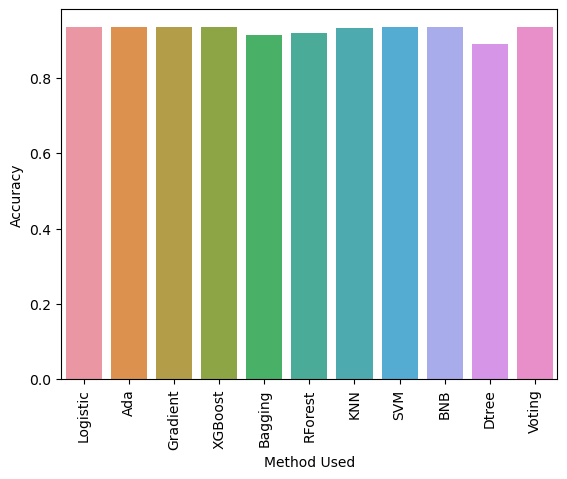

In [165]:
point1 = ["Logistic",'Ada','Gradient','XGBoost','Bagging','RForest','KNN','SVM','BNB', 'Dtree','Voting']
point2 = [accuracy_lr, accuracy_ada, accuracy_gdm, accuracy_xgboost , accuracy_bagging , accuracy_rf, accuracy_knnmodel,
accuracy_SVClass, accuracy_bernb, accuracy_dtree, accuracy_voting]

final_output = pd.DataFrame({"Method Used": point1, "Accuracy":point2})
print(final_output)

# visualization

chart = sns.barplot(x="Method Used", y="Accuracy", data=final_output)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

##### We need to study all the models to get the best model considering the Precision, Recall and F1score for the indivdual models,we need to look for overfitting (100% accuracy) in Train accuracy as well, which few models are exhibiting, for now I am saving all the Models.

In [166]:
import pickle

# List of models and their corresponding names
models = [lr, ada, gdm, xgb, bagging, rf, knn, svm, bnb, dt, voting]
model_names = ['lr_Model', 'ada_Model', 'gdm_Model', 'xgb_Model', 'bagging_Model', 
               'rf_Model', 'knn_Model', 'svm_Model', 'bnb_Model', 'dt_Model', 'voting_Model']

# Save all models
for model, name in zip(models, model_names):
    filename = name + '.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model '{name}' saved as '{filename}'")

Model 'lr_Model' saved as 'lr_Model.pkl'
Model 'ada_Model' saved as 'ada_Model.pkl'
Model 'gdm_Model' saved as 'gdm_Model.pkl'
Model 'xgb_Model' saved as 'xgb_Model.pkl'
Model 'bagging_Model' saved as 'bagging_Model.pkl'
Model 'rf_Model' saved as 'rf_Model.pkl'
Model 'knn_Model' saved as 'knn_Model.pkl'
Model 'svm_Model' saved as 'svm_Model.pkl'
Model 'bnb_Model' saved as 'bnb_Model.pkl'
Model 'dt_Model' saved as 'dt_Model.pkl'
Model 'voting_Model' saved as 'voting_Model.pkl'


In [167]:
model_files = [
    'lr_Model.pkl', 'ada_Model.pkl', 'gdm_Model.pkl', 'xgb_Model.pkl',
    'bagging_Model.pkl', 'rf_Model.pkl', 'knn_Model.pkl', 'svm_Model.pkl',
    'bnb_Model.pkl', 'dt_Model.pkl', 'voting_Model.pkl'
]

models = {}
for file in model_files:
    with open(file, 'rb') as f:
        model_name = file.split('.')[0]  # Extract model name from file name
        models[model_name] = pickle.load(f)

predictions = {}
for model_name, model in models.items():
    predictions[model_name] = model.predict(X_val)

predictions_df = pd.DataFrame(predictions)

excel_file_path = 'model_predictions_final.xlsx'

predictions_df.to_excel(excel_file_path, index=False)

print(f"Model predictions exported to '{excel_file_path}'")

Model predictions exported to 'model_predictions_final.xlsx'


# Thank You!